## Naive Bayes Classifiers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs

%matplotlib notebook

In [4]:
from sklearn.model_selection import train_test_split

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

<IPython.core.display.Javascript object>


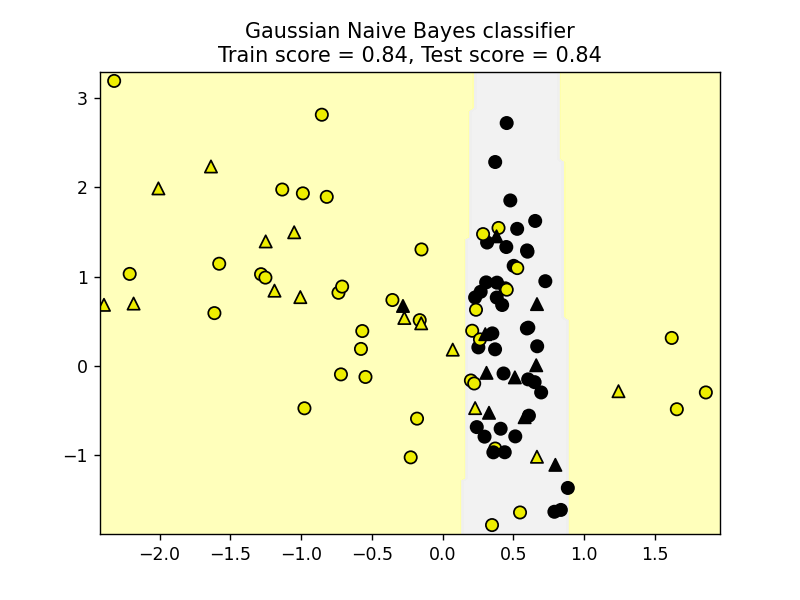

In [5]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

nbclf = GaussianNB().fit(X_train,y_train)

plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test, 'Gaussian Naive Bayes classifier')

In [7]:
from sklearn.datasets import load_breast_cancer

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state =0)

nbclf = GaussianNB().fit(X_train, y_train)
print('accuracy on training set is: {:.2f}'.format(nbclf.score(X_train,y_train)))
print('accuracy on test set is: {:.2f}'.format(nbclf.score(X_test,y_test)))

accuracy on training set is: 0.95
accuracy on test set is: 0.94


## Random Forests

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

fruits = pd.read_table('assets/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']


<IPython.core.display.Javascript object>


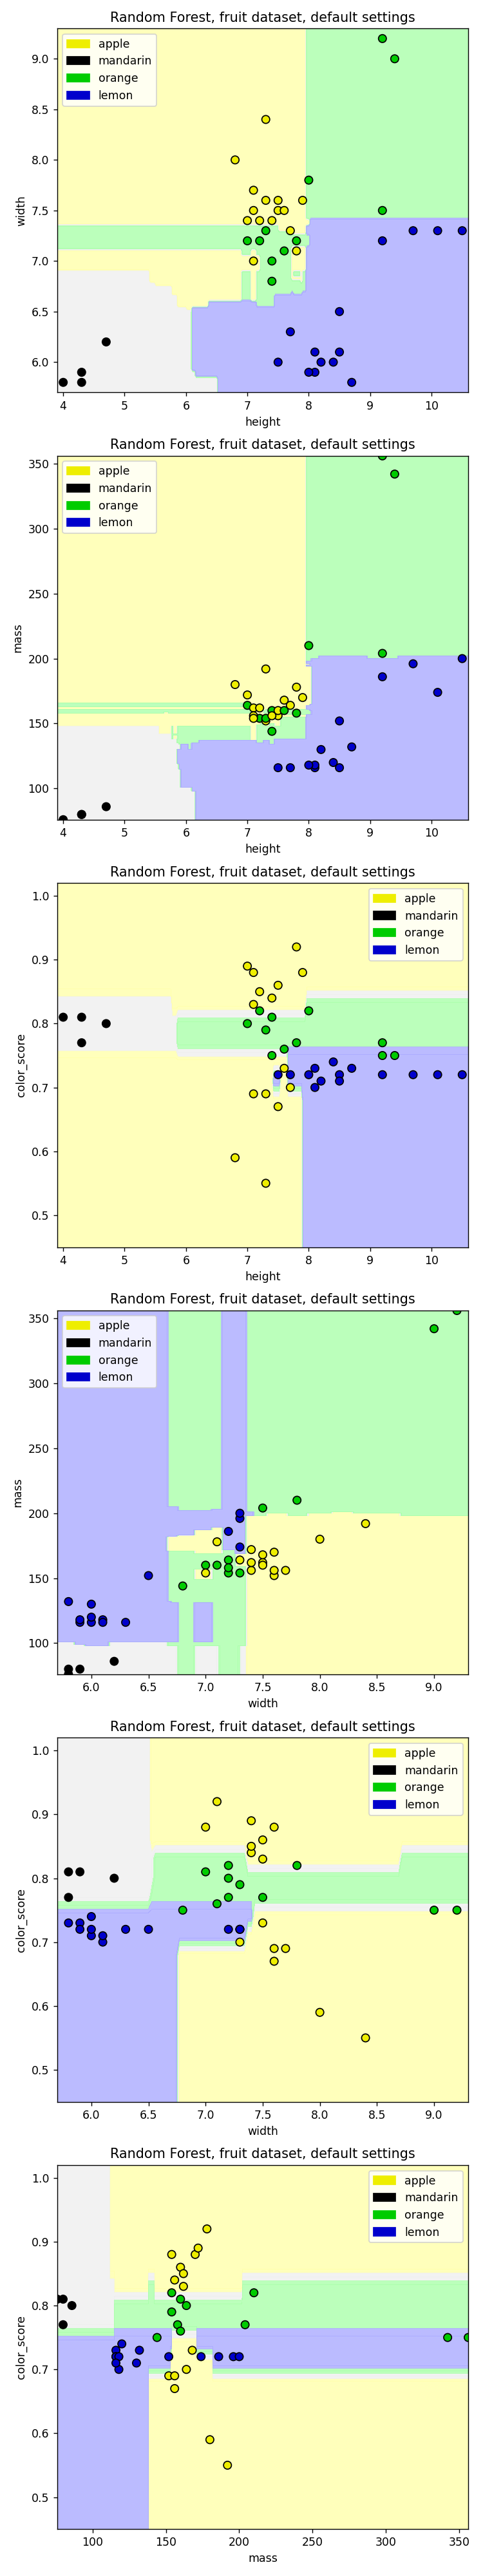

accuracy of RF classifier on training: 1.00
accuracy of RF classifier on test: 0.80


In [6]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.values, y_fruits.values, random_state=0)


fig, subaxes = plt.subplots(6,1,figsize=(6,32))
title='Random Forest, fruit dataset, default settings'
pair_list = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    clf = RandomForestClassifier().fit(X,y)
    plot_class_regions_for_classifier_subplot(clf,X,y,None,None,title,axis,target_names_fruits)
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])

plt.tight_layout()

clf = RandomForestClassifier(n_estimators=10,random_state=0).fit(X_train,y_train)

print('accuracy of RF classifier on training: {:.2f}'.format(clf.score(X_train,y_train)))
print('accuracy of RF classifier on test: {:.2f}'.format(clf.score(X_test,y_test)))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 20, random_state = 0)
clf.fit(X_train, y_train)

print('accuracy for training: {:.2f}'.format(clf.score(X_train, y_train)))
print('accuracy for test: {:.2f}'.format(clf.score(X_test, y_test)))


accuracy for training: 1.00
accuracy for test: 0.97


## Gradient Boost Decision Trees

<IPython.core.display.Javascript object>


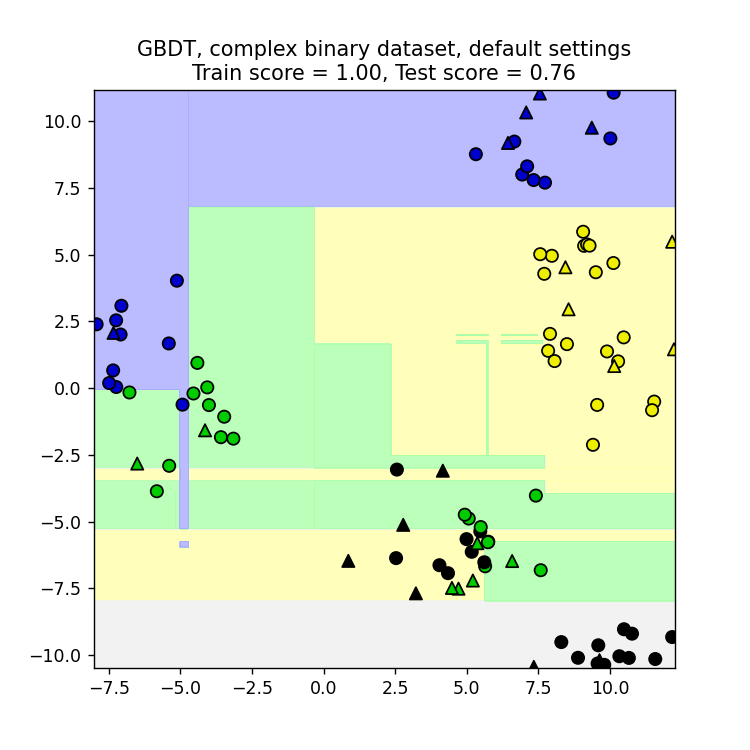

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(1,1,figsize=(6,6))

clf = GradientBoostingClassifier().fit(X_train,y_train)
title='GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf,X_train,y_train,X_test,y_test,title,subaxes)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_train)

print('Breast cancer dataset (lr = 0.1, depth=3)')
print('accuracy on training: {:.2f}'.format(clf.score(X_train,y_train)))
print('accuracy on test: {:.2f}'.format(clf.score(X_test,y_test)))

clf = GradientBoostingClassifier(learning_rate=0.01,max_depth=2,random_state=0)
clf.fit(X_train,y_train)


print('Breast cancer dataset (lr = 0.01, depth=2)')
print('accuracy on training: {:.2f}'.format(clf.score(X_train,y_train)))
print('accuracy on test: {:.2f}'.format(clf.score(X_test,y_test)))


Breast cancer dataset (lr = 0.1, depth=3)
accuracy on training: 1.00
accuracy on test: 0.76
Breast cancer dataset (lr = 0.01, depth=2)
accuracy on training: 0.96
accuracy on test: 0.80
